# 
# Modelling - Machine Learning

In [34]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud = pd.read_csv("dataset.csv")

In [3]:
fraud = fraud.drop("Unnamed: 0",axis=1)
fraud.head()

,Provider,PotentialFraud,DaysAdmitted,DeductibleAmtPaid,InscClaimAmtReimbursed,NumOfDoctors,NumOfPatients,NumOfClms,numCounties,AvgChronic,AvgClaim,Age,male,female
0,PRV51001,No,2.440000,213.600000,4185.600000,14,24,25,7,5.888889,2.777778,77.729167,9,15
1,PRV51003,Yes,4.674242,502.166667,4588.409091,44,117,132,23,5.000000,12.000000,68.507123,49,68
2,PRV51004,No,2.429530,2.080537,350.134228,38,138,149,28,4.500000,14.900000,71.977657,45,93
3,PRV51005,Yes,2.088412,3.175966,241.124464,6,495,1165,26,4.500000,116.500000,69.552102,208,287
4,PRV51007,No,1.958333,45.333333,468.194444,10,58,72,6,4.000000,8.000000,67.568966,27,31


In [4]:
fraud.columns

Index(['Provider', 'PotentialFraud', 'DaysAdmitted', 'DeductibleAmtPaid',
       'InscClaimAmtReimbursed', 'NumOfDoctors', 'NumOfPatients', 'NumOfClms',
       'numCounties', 'AvgChronic', 'AvgClaim', 'Age', 'male', 'female'],
      dtype='object')

In [5]:
cols = ['DaysAdmitted', 'DeductibleAmtPaid',
       'InscClaimAmtReimbursed', 'NumOfDoctors', 'NumOfPatients', 'NumOfClms',
       'numCounties', 'AvgChronic', 'AvgClaim', 'Age', 'male', 'female']

In [18]:
fraud = fraud.dropna()

In [19]:
X = fraud[cols]
Y = fraud["PotentialFraud"].apply(lambda x: True if x == "Yes" else False)

In [20]:
#split data

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size=0.3,random_state=101,stratify=Y,shuffle=True)

In [27]:
# Training

In [28]:
from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=123)    

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
#in the input data as ``n_samples / (n_classes * np.bincount(y))``.

log.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=123)

In [29]:
## Lets predict probability of 1 and 0 for X_train and X_val

log_train_pred_probability=log.predict_proba(X_train)
log_val_pred_probability=log.predict_proba(X_val)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


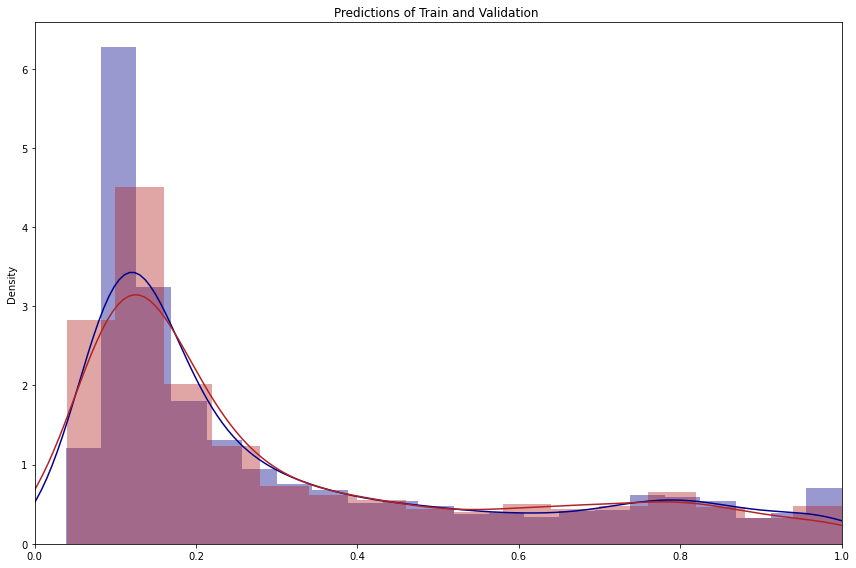

In [35]:
# Lets compare model prediction performance on train and Validation both.

fig = plt.figure(figsize=(12,8))

sns.distplot(log.predict_proba(X_train)[:,1],color='darkblue')
sns.distplot(log.predict_proba(X_val)[:,1],color='firebrick')
plt.title('Predictions of Train and Validation ')
plt.xlim([0, 1])

plt.tight_layout()

plt.show()


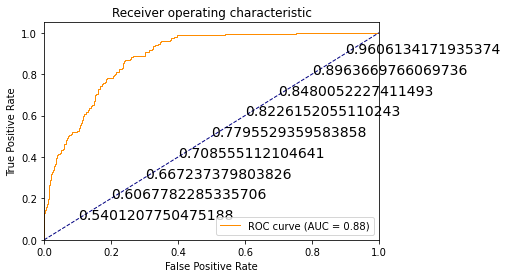

In [36]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_val,log.predict_proba(X_val)[:,1])         #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [37]:
fpr, tpr, thresholds =roc_curve(y_val, log.predict_proba(X_val)[:,1],pos_label=1)     #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)


Area under the ROC curve : 0.884168


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


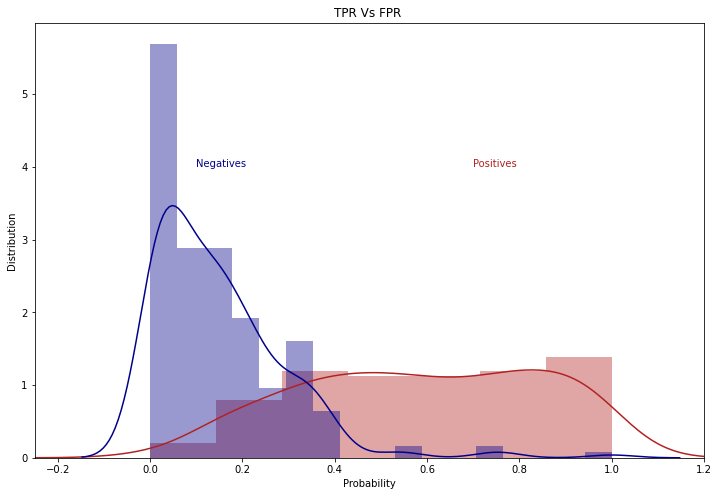

In [38]:
## Lets Check Tpr vs fpr distribution.

fig = plt.figure(figsize=(12,8))

sns.distplot(tpr,color='firebrick')

sns.distplot(fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negatives',color='darkblue')
plt.text(0.7,4,'Positives',color='firebrick')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

In [40]:
## Lets Set probability Threshold to 0.50

log_train_pred_60=(log.predict_proba(X_train)[:,1]>0.50).astype(bool)
log_val_pred_60=(log.predict_proba(X_val)[:,1]>0.50).astype(bool)   # set threshold as 0.60


In [41]:
#Confusion matrix, Accuracy, sensitivity and specificity

from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc

cm0 = confusion_matrix(y_train, log_train_pred_60,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, log_val_pred_60,labels=[1,0])
print('Confusion Matrix Val: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train: ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity Train : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )


specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity Train: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(y_val, log_val_pred_60)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, log_val_pred_60)

print("AUC         :",AUC)

print("F1-Score Train  : ",f1_score(y_train, log_train_pred_60))

print("F1-Score Val  : ",f1_score(y_val, log_val_pred_60))

Confusion Matrix Train : 
 [[ 282   72]
 [ 607 2825]]
Confusion Matrix Val: 
 [[ 115   37]
 [ 261 1210]]
Accuracy Train:  0.8206550449022715
Accuracy Val:  0.8163894023413432
Sensitivity Train :  0.7966101694915254
Sensitivity Val:  0.756578947368421
Specificity Train:  0.8231351981351981
Specificity Val:  0.822569680489463
Kappa Value : 0.3487369384897123
AUC         : 0.789574313928942
F1-Score Train  :  0.45374094931617054
F1-Score Val  :  0.4356060606060606


In [42]:
## Lets Apply Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=123,max_depth=4) 

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=500,
                       random_state=123)

In [46]:
fpr, tpr, thresholds =roc_curve(y_val, rfc.predict_proba(X_val)[:,1],pos_label=1)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.928835


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


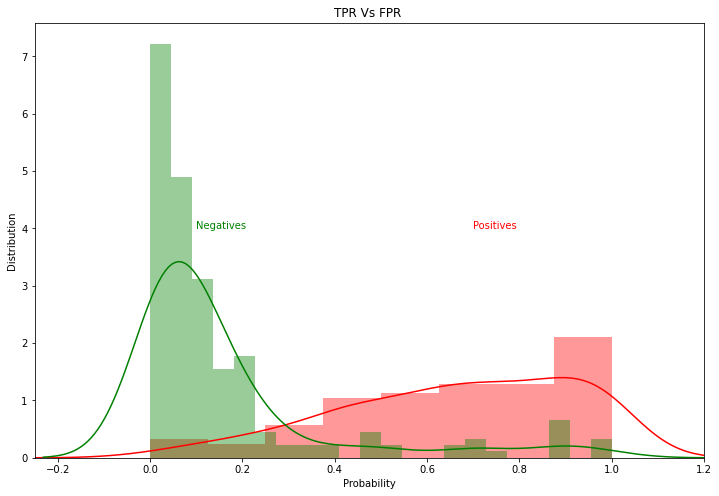

In [55]:
fig = plt.figure(figsize=(12,8))

sns.distplot(tpr,color='red')

sns.distplot(fpr,color='green')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negatives',color='green')
plt.text(0.7,4,'Positives',color='red')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

In [48]:
rfc_train_pred = (rfc.predict_proba(X_train)[:,1]>0.4).astype(bool)   # Set threshold to 0.4
rfc_val_pred = (rfc.predict_proba(X_val)[:,1]>0.4).astype(bool)# Set threshold to 0.4


In [49]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train, rfc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, rfc_val_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_val, rfc_val_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, rfc_val_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,rfc_train_pred))
print("F1-Score Validation : ",f1_score(y_val, rfc_val_pred))

Confusion Matrix Train : 
 [[ 332   22]
 [ 646 2786]]
Confusion Matrix Test: 
 [[ 139   13]
 [ 283 1188]]
Accuracy Train :  0.8235604860010565
Accuracy Test :  0.8176216882316697
Sensitivity :  0.9144736842105263
Specificity :  0.8076138681169273
Kappa Value : 0.4019673502515828
AUC         : 0.8610437761637267
F1-Score Train 0.4984984984984984
F1-Score Validation :  0.4843205574912892


<AxesSubplot:>

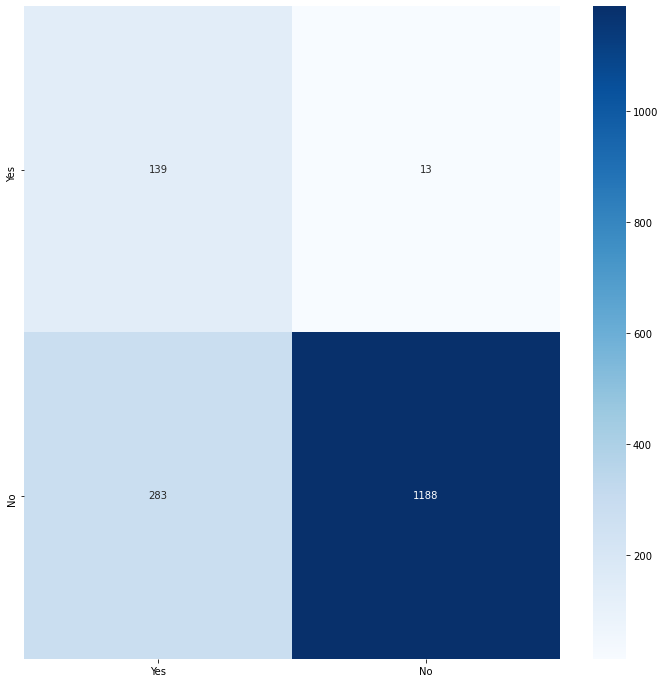

In [51]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm1, xticklabels=["Yes","No"], yticklabels=["Yes","No"], annot=True, fmt="d",cmap='Blues')